In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

#DatetimeIndex 생성 - 범위지정
dtidx1 = pd.date_range('2023-01-01', '2023-01-15')
dtidx1

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15'],
              dtype='datetime64[ns]', freq='D')

In [3]:
#DatetimeIndex 생성 - to_datetime함수
dtidx3 = pd.to_datetime( ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'])
dtidx3

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq=None)

In [4]:
#PeriodIndex 생성 - period_range함수
ridx1 = pd.period_range('2023-01-01', periods=7, freq='W')
ridx1

PeriodIndex(['2022-12-26/2023-01-01', '2023-01-02/2023-01-08',
             '2023-01-09/2023-01-15', '2023-01-16/2023-01-22',
             '2023-01-23/2023-01-29', '2023-01-30/2023-02-05',
             '2023-02-06/2023-02-12'],
            dtype='period[W-SUN]')

In [5]:
#PeriodIndex 생성 - period_range함수
ridx2 = pd.period_range('2023-01-01', periods=7, freq='M')
ridx2

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07'],
            dtype='period[M]')

In [6]:
df1_1 = pd.DataFrame({"name": np.arange(7), "val": np.random.randint(7, size=7)},
                   index=pd.period_range('2023-01-01', periods=7, freq='W') )
df1_1

,name,val
2022-12-26/2023-01-01,0,4
2023-01-02/2023-01-08,1,3
2023-01-09/2023-01-15,2,4
2023-01-16/2023-01-22,3,5
2023-01-23/2023-01-29,4,5
2023-01-30/2023-02-05,5,1
2023-02-06/2023-02-12,6,5


In [7]:
df1_1.asfreq('3D')

,name,val
2023-01-01,0,4
2023-01-08,1,3
2023-01-15,2,4
2023-01-22,3,5
2023-01-29,4,5
2023-02-05,5,1
2023-02-12,6,5


In [8]:
df1_1.asfreq('3D', how='start')

,name,val
2022-12-26,0,4
2023-01-02,1,3
2023-01-09,2,4
2023-01-16,3,5
2023-01-23,4,5
2023-01-30,5,1
2023-02-06,6,5


In [9]:
df1_1.asfreq('3D', how='end')

,name,val
2023-01-01,0,4
2023-01-08,1,3
2023-01-15,2,4
2023-01-22,3,5
2023-01-29,4,5
2023-02-05,5,1
2023-02-12,6,5


In [25]:
#TimedeltaIndex 생성 - timedelta_range함수
tdidx1 = pd.timedelta_range(start='0', end='2days', freq='4H')
tdidx1

TimedeltaIndex(['0 days 00:00:00', '0 days 04:00:00', '0 days 08:00:00',
                '0 days 12:00:00', '0 days 16:00:00', '0 days 20:00:00',
                '1 days 00:00:00', '1 days 04:00:00', '1 days 08:00:00',
                '1 days 12:00:00', '1 days 16:00:00', '1 days 20:00:00',
                '2 days 00:00:00'],
               dtype='timedelta64[ns]', freq='4H')

In [26]:
#TimedeltaIndex 생성 - timedelta_range함수, left
pd.timedelta_range(start='0', end='2days', freq='4H', closed='left')


TimedeltaIndex(['0 days 00:00:00', '0 days 04:00:00', '0 days 08:00:00',
                '0 days 12:00:00', '0 days 16:00:00', '0 days 20:00:00',
                '1 days 00:00:00', '1 days 04:00:00', '1 days 08:00:00',
                '1 days 12:00:00', '1 days 16:00:00', '1 days 20:00:00'],
               dtype='timedelta64[ns]', freq='4H')

## 리샘플링하기

In [27]:
# 간단한 시계열 데이터 만들기
data = {"name": np.arange(15), "val": np.random.randint(15, size=15)}
df1 = pd.DataFrame(data, index=dtidx1 )
df1

,name,val
2023-01-01,0,11
2023-01-02,1,8
2023-01-03,2,8
2023-01-04,3,4
2023-01-05,4,7
2023-01-06,5,8
2023-01-07,6,5
2023-01-08,7,6
2023-01-09,8,0
2023-01-10,9,10


In [28]:
df1.asfreq('D', how='start')

,name,val
2023-01-01,0,11
2023-01-02,1,8
2023-01-03,2,8
2023-01-04,3,4
2023-01-05,4,7
2023-01-06,5,8
2023-01-07,6,5
2023-01-08,7,6
2023-01-09,8,0
2023-01-10,9,10


In [29]:
df1.asfreq('20H', normalize=False).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2023-01-01 00:00:00 to 2023-01-14 08:00:00
Freq: 20H
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      float64
 1   val     3 non-null      float64
dtypes: float64(2)
memory usage: 408.0 bytes


In [30]:
# resample로 주별 합계 구하기
df1.resample('w').sum()

,name,val
2023-01-01,0,11
2023-01-08,28,46
2023-01-15,77,58


In [31]:
# groupby로 주별 합계 구하기
df1.groupby(df1.index.isocalendar().week).sum()

,name,val
week,,
1,28,46
2,77,58
52,0,11


In [32]:
# asfreq로 주별 데이터 선택하기
df1.asfreq('W')

,name,val
2023-01-01,0,11
2023-01-08,7,6
2023-01-15,14,10


In [33]:
df1.asfreq('D')

,name,val
2023-01-01,0,11
2023-01-02,1,8
2023-01-03,2,8
2023-01-04,3,4
2023-01-05,4,7
2023-01-06,5,8
2023-01-07,6,5
2023-01-08,7,6
2023-01-09,8,0
2023-01-10,9,10


In [35]:
## pd.timedelta_range(start='0', end='2days', freq='4H', closed='left').asfreq('D', normalize=True)

In [36]:
df1.asfreq('W').sum(axis=1)

2023-01-01    11
2023-01-08    13
2023-01-15    24
Freq: W-SUN, dtype: int64

## 실사례 데이터로 resample를 알아보자

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #데이터 구조, 행열 크기 알아보기
act.head()

,timestamp,X,Y,Z
0,2022-01-01 00:01:40.363,33,76,56
1,2022-01-01 00:01:42.961,34,87,56
2,2022-01-01 00:01:45.562,25,89,47
3,2022-01-01 00:01:48.163,11,70,50
4,2022-01-01 00:02:08.864,33,72,58


In [38]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  66281 non-null  object
 1   X          66281 non-null  int64 
 2   Y          66281 non-null  int64 
 3   Z          66281 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [40]:
# act.resample('D').mean() # 실패... index가 없으므로...

## timestamp가 인덱스가 아니므로 resample할 수 없다. <br/>timestamp를 DatetimeIndex로 변경해 보자.

# 시각정보 문자열을 datetime으로 변경하기

In [ ]:
# 시각 정보 문자열을 datetime64 데이터타입으로 변경하기
act['new_time']  = pd.to_datetime( act['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
act.head()

,timestamp,X,Y,Z,new_time
0,2022-01-01 00:01:40.363,33,76,56,2022-01-01 00:01:40.363
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:42.961
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:45.562
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:48.163
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:02:08.864


In [ ]:
# info함수로 칼럼 정보를 살펴보자
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  66281 non-null  object        
 1   X          66281 non-null  int64         
 2   Y          66281 non-null  int64         
 3   Z          66281 non-null  int64         
 4   new_time   66281 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.5+ MB


In [ ]:
act['new_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 66281 entries, 0 to 66280
Series name: new_time
Non-Null Count  Dtype         
--------------  -----         
66281 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 517.9 KB


In [ ]:
act = act[['new_time', 'X', 'Y', 'Z']]

In [ ]:
# rangeindex를 datetimeindex로 변경
act.set_index('new_time', inplace=True)

In [74]:
act.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66281 entries, 2022-01-01 00:01:40.363000 to 2022-01-31 23:32:44.126000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       66281 non-null  int64
 1   Y       66281 non-null  int64
 2   Z       66281 non-null  int64
dtypes: int64(3)
memory usage: 2.0 MB


In [75]:
act

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,33,76,56
2022-01-01 00:01:42.961,34,87,56
2022-01-01 00:01:45.562,25,89,47
2022-01-01 00:01:48.163,11,70,50
2022-01-01 00:02:08.864,33,72,58
...,...,...,...
2022-01-31 23:28:00.481,-91,143,136
2022-01-31 23:28:41.683,-89,145,138
2022-01-31 23:28:49.383,-93,138,137


In [76]:
act.index
#index가 DatetimeIndex로 변경된 점이 확인된다.
#resample하기 위해서는 DataFrame의 index가 DatetimeIndex, PeriodIndex, TimedeltaIndex 이어야 한다.


DatetimeIndex(['2022-01-01 00:01:40.363000', '2022-01-01 00:01:42.961000',
               '2022-01-01 00:01:45.562000', '2022-01-01 00:01:48.163000',
               '2022-01-01 00:02:08.864000', '2022-01-01 00:02:21.765000',
               '2022-01-01 00:02:32.092000', '2022-01-01 00:02:37.297000',
               '2022-01-01 00:03:10.795000', '2022-01-01 00:03:31.301000',
               ...
               '2022-01-31 23:25:15.974000', '2022-01-31 23:27:32.381000',
               '2022-01-31 23:27:42.580000', '2022-01-31 23:27:50.282000',
               '2022-01-31 23:27:55.381000', '2022-01-31 23:28:00.481000',
               '2022-01-31 23:28:41.683000', '2022-01-31 23:28:49.383000',
               '2022-01-31 23:32:36.426000', '2022-01-31 23:32:44.126000'],
              dtype='datetime64[ns]', name='new_time', length=66281, freq=None)

In [77]:
# 일자별 X, Y, Z 평균 위치를 구해보자. 
act.resample('D').mean()

,X,Y,Z
new_time,,,
2022-01-01,45.181458,230.855784,79.015055
2022-01-02,33.717431,167.839047,104.839408
2022-01-03,-13.646741,187.623683,122.057785
2022-01-04,22.882040,278.679604,80.347032
2022-01-05,81.304762,182.480952,110.154762
2022-01-06,47.897631,193.845178,97.742809
2022-01-07,76.385113,134.345739,107.011866
2022-01-08,28.479100,387.379421,62.295016
2022-01-09,34.519963,288.278552,74.149489


In [78]:
act.resample('D').sum()

,X,Y,Z
new_time,,,
2022-01-01,57019,291340,99717
2022-01-02,93431,465082,290510
2022-01-03,-47941,659122,428789
2022-01-04,60134,732370,211152
2022-01-05,34148,76642,46265
2022-01-06,56615,229125,115532
2022-01-07,141618,249077,198400
2022-01-08,35428,481900,77495
2022-01-09,37178,310476,79859


In [79]:
act.resample('D', closed='right').sum()

,X,Y,Z
new_time,,,
2022-01-01,57019,291340,99717
2022-01-02,93431,465082,290510
2022-01-03,-47941,659122,428789
2022-01-04,60134,732370,211152
2022-01-05,34148,76642,46265
2022-01-06,56615,229125,115532
2022-01-07,141618,249077,198400
2022-01-08,35428,481900,77495
2022-01-09,37178,310476,79859


In [80]:
act.resample('D').ohlc()

X                    Y                   Z               
           open high  low close open high low close open high low close
new_time                                                               
2022-01-01   33  289 -140   -87   76  609  34   143   56  197  -6   142
2022-01-02  -90  260 -137   129  180  588  34    56  139  196  -9   144
2022-01-03  130  275 -178   137   61  599  35    59  145  197 -10   128
2022-01-04  124  254 -251    -7   84  592  36    93   65  192 -10   103
2022-01-05  135  295 -185     0   65  602  41    60  125  194  -7   117
2022-01-06  239  279 -236    30  118  605  36    37  108  196  -8    52
2022-01-07   32  263 -215   196   33  593  33    72   57  194  -5   101
2022-01-08   29  192 -187   -13   70  601  46   510   49  197  -7    39
2022-01-09  -18  291 -191   -66  510  604  36    77   47  188 -14   167
2022-01-10   11  289 -180   122  456  601  31    46   33  196 -15   116
2022-01-11  126  296 -230    15   46  603  38   106  115  198 -12    23
2022-01-12  149  304 -237   -61   91  596  32   142  141  192 -11   166
2022-01-13  -94  113  -99   -95  137  263  32   189  139  178  -9   134
2022-01-14   30  117  -95    71   86  268  32   227   51  172   1    57
2022-01-15   67  117  -97   -88  226  266  32   120   43  175  -4   140
2022-01-16  -91  115  -99   -94  164  268  32   174  129  173 -10   143
2022-01-17   33  113  -95    27   58  264  34   250   77  161  -1    78
2022-01-18   21  117  -99     2  141  266  32   177   53  171   4    57
2022-01-19   24  172  -97    81  176  267  33   221   67  168  -3    53
2022-01-20   34  117  -96   -87  102  268  32   214   94  170   0   140
2022-01-21  -87  115  -97   -92  212  264  31   155  139  174   0   125
2022-01-22  -93  116  -96    31  154  268  32   192  141  149   0    35
2022-01-23  -91  114  -91    33  206  266  37   137  138  177 -11    64
2022-01-24   32  117  -96    27  164  265  34   153   58  166   9    46
2022-01-25   23  129  -95   -11  156  263  36    43   58  168 -14    35
2022-01-26  -84  128  -96   -60  220  249  33    66  131  172   4   154
2022-01-27   33  128  -96    28   52  265  31    44   52  164   8    53
2022-01-28   23  123  -99   -74   57  266  32    78   66  169  -2   148
2022-01-29  -87  116  -99   -93  129  268  34   145  139  172 -12   138
2022-01-30  -88  115  -99    24  136  268  37    67  143  174  -6    12
2022-01-31   66  111  -95   -91  235  260  40   129   53  177 -11   138

In [81]:
act.resample('D').count()

,X,Y,Z
new_time,,,
2022-01-01,1262,1262,1262
2022-01-02,2771,2771,2771
2022-01-03,3513,3513,3513
2022-01-04,2628,2628,2628
2022-01-05,420,420,420
2022-01-06,1182,1182,1182
2022-01-07,1854,1854,1854
2022-01-08,1244,1244,1244
2022-01-09,1077,1077,1077


In [101]:

hourly_pos = act.groupby(act.index.day).mean()
hourly_pos

,X,Y,Z
new_time,,,
1,45.181458,230.855784,79.015055
2,33.717431,167.839047,104.839408
3,-13.646741,187.623683,122.057785
4,22.882040,278.679604,80.347032
5,81.304762,182.480952,110.154762
6,47.897631,193.845178,97.742809
7,76.385113,134.345739,107.011866
8,28.479100,387.379421,62.295016
9,34.519963,288.278552,74.149489


<AxesSubplot: xlabel='new_time'>

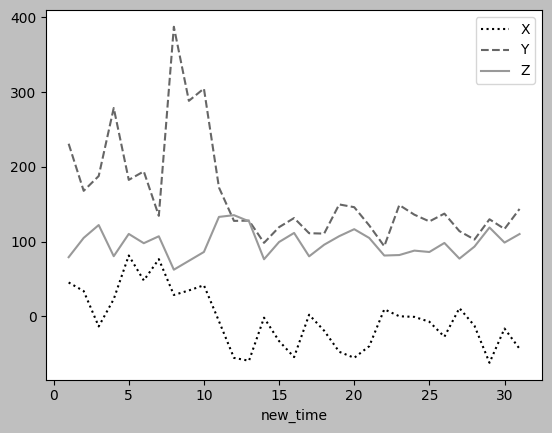

In [120]:
# 활동은 의미가 있을 듯 함.
hourly_pos.plot(style=[':','--','-'])

In [121]:
act.info()
# act.asfreq("D", how="end")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66281 entries, 2022-01-01 00:01:40.363000 to 2022-01-31 23:32:44.126000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       66281 non-null  int64
 1   Y       66281 non-null  int64
 2   Z       66281 non-null  int64
dtypes: int64(3)
memory usage: 2.0 MB


In [122]:
# act.asfreq('W').isnull().sum(axis=1)

In [123]:
## shift알아보기

In [124]:
act_shift = act.shift(3)
act_shift.head()

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,NaN,NaN,NaN
2022-01-01 00:01:42.961,NaN,NaN,NaN
2022-01-01 00:01:45.562,NaN,NaN,NaN
2022-01-01 00:01:48.163,33.0,76.0,56.0
2022-01-01 00:02:08.864,34.0,87.0,56.0


In [125]:
act_shift[:-10]

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,NaN,NaN,NaN
2022-01-01 00:01:42.961,NaN,NaN,NaN
2022-01-01 00:01:45.562,NaN,NaN,NaN
2022-01-01 00:01:48.163,33.0,76.0,56.0
2022-01-01 00:02:08.864,34.0,87.0,56.0
...,...,...,...
2022-01-31 23:19:34.856,-90.0,151.0,138.0
2022-01-31 23:19:37.454,-85.0,85.0,149.0
2022-01-31 23:19:52.756,-90.0,135.0,140.0


In [126]:
act[:-10]

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,33,76,56
2022-01-01 00:01:42.961,34,87,56
2022-01-01 00:01:45.562,25,89,47
2022-01-01 00:01:48.163,11,70,50
2022-01-01 00:02:08.864,33,72,58
...,...,...,...
2022-01-31 23:19:34.856,-95,149,138
2022-01-31 23:19:37.454,-93,133,137
2022-01-31 23:19:52.756,-89,158,139


In [127]:

act.resample('d').mean().shift(3, fill_value=0)


,X,Y,Z
new_time,,,
2022-01-01,0.000000,0.000000,0.000000
2022-01-02,0.000000,0.000000,0.000000
2022-01-03,0.000000,0.000000,0.000000
2022-01-04,45.181458,230.855784,79.015055
2022-01-05,33.717431,167.839047,104.839408
2022-01-06,-13.646741,187.623683,122.057785
2022-01-07,22.882040,278.679604,80.347032
2022-01-08,81.304762,182.480952,110.154762
2022-01-09,47.897631,193.845178,97.742809


In [128]:
act.resample('d').mean().shift(freq="7D", fill_value=0)

,X,Y,Z
new_time,,,
2022-01-08,45.181458,230.855784,79.015055
2022-01-09,33.717431,167.839047,104.839408
2022-01-10,-13.646741,187.623683,122.057785
2022-01-11,22.882040,278.679604,80.347032
2022-01-12,81.304762,182.480952,110.154762
2022-01-13,47.897631,193.845178,97.742809
2022-01-14,76.385113,134.345739,107.011866
2022-01-15,28.479100,387.379421,62.295016
2022-01-16,34.519963,288.278552,74.149489


In [129]:
act.resample('d').mean()['X'].tshift(3)

C:\Users\sunin\AppData\Local\Temp\ipykernel_36276\4131489629.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  act.resample('d').mean()['X'].tshift(3)


new_time
2022-01-04    45.181458
2022-01-05    33.717431
2022-01-06   -13.646741
2022-01-07    22.882040
2022-01-08    81.304762
2022-01-09    47.897631
2022-01-10    76.385113
2022-01-11    28.479100
2022-01-12    34.519963
2022-01-13    41.457949
2022-01-14    -6.569293
2022-01-15   -55.713615
2022-01-16   -59.560531
2022-01-17    -1.931100
2022-01-18   -33.231646
2022-01-19   -54.670087
2022-01-20     2.039523
2022-01-21   -19.387573
2022-01-22   -47.537708
2022-01-23   -55.645864
2022-01-24   -40.082825
2022-01-25     9.263728
2022-01-26    -0.038596
2022-01-27    -0.846871
2022-01-28    -7.387526
2022-01-29   -27.490000
2022-01-30    10.856315
2022-01-31   -12.712274
2022-02-01   -62.285688
2022-02-02   -16.488204
2022-02-03   -43.523156
Freq: D, Name: X, dtype: float64

In [130]:
act.resample('d').mean().tshift(3)

C:\Users\sunin\AppData\Local\Temp\ipykernel_36276\4045743159.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  act.resample('d').mean().tshift(3)


,X,Y,Z
new_time,,,
2022-01-04,45.181458,230.855784,79.015055
2022-01-05,33.717431,167.839047,104.839408
2022-01-06,-13.646741,187.623683,122.057785
2022-01-07,22.882040,278.679604,80.347032
2022-01-08,81.304762,182.480952,110.154762
2022-01-09,47.897631,193.845178,97.742809
2022-01-10,76.385113,134.345739,107.011866
2022-01-11,28.479100,387.379421,62.295016
2022-01-12,34.519963,288.278552,74.149489


In [131]:
act.resample('d').mean().shift(freq="3D")

,X,Y,Z
new_time,,,
2022-01-04,45.181458,230.855784,79.015055
2022-01-05,33.717431,167.839047,104.839408
2022-01-06,-13.646741,187.623683,122.057785
2022-01-07,22.882040,278.679604,80.347032
2022-01-08,81.304762,182.480952,110.154762
2022-01-09,47.897631,193.845178,97.742809
2022-01-10,76.385113,134.345739,107.011866
2022-01-11,28.479100,387.379421,62.295016
2022-01-12,34.519963,288.278552,74.149489


C:\Users\sunin\AppData\Local\Temp\ipykernel_36276\1065910418.py:4: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  act.resample('d').mean()['X'].tshift(3).plot(style="--", label="X tshift(3)")


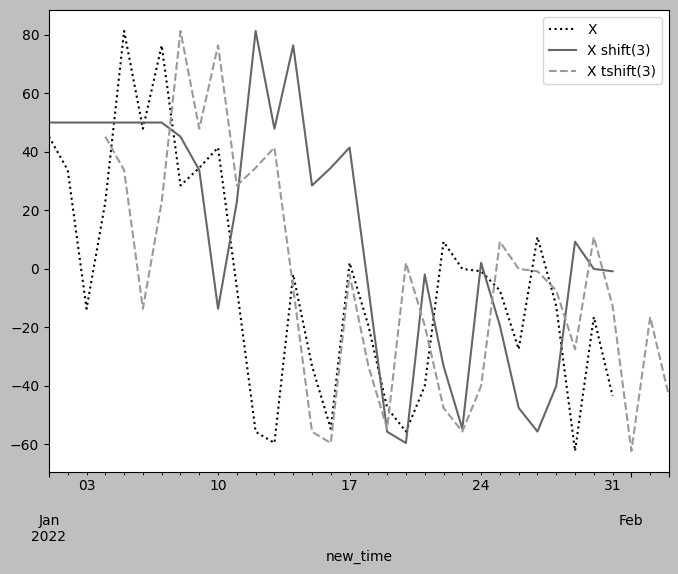

In [138]:
plt.style.use('grayscale')
act.resample('d').mean()['X'].plot(style=":", label="X", figsize=(8,6))
act.resample('d').mean()['X'].shift(7, fill_value=50).plot(style="-", label="X shift(3)")
act.resample('d').mean()['X'].tshift(3).plot(style="--", label="X tshift(3)")
plt.legend(loc="best")
plt.show()


In [139]:
act.resample('d').mean().shift(freq="7D")

,X,Y,Z
new_time,,,
2022-01-08,45.181458,230.855784,79.015055
2022-01-09,33.717431,167.839047,104.839408
2022-01-10,-13.646741,187.623683,122.057785
2022-01-11,22.882040,278.679604,80.347032
2022-01-12,81.304762,182.480952,110.154762
2022-01-13,47.897631,193.845178,97.742809
2022-01-14,76.385113,134.345739,107.011866
2022-01-15,28.479100,387.379421,62.295016
2022-01-16,34.519963,288.278552,74.149489


In [140]:
act.resample('d').mean().tshift(freq="7D")

C:\Users\sunin\AppData\Local\Temp\ipykernel_36276\1705386114.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  act.resample('d').mean().tshift(freq="7D")


,X,Y,Z
new_time,,,
2022-01-08,45.181458,230.855784,79.015055
2022-01-09,33.717431,167.839047,104.839408
2022-01-10,-13.646741,187.623683,122.057785
2022-01-11,22.882040,278.679604,80.347032
2022-01-12,81.304762,182.480952,110.154762
2022-01-13,47.897631,193.845178,97.742809
2022-01-14,76.385113,134.345739,107.011866
2022-01-15,28.479100,387.379421,62.295016
2022-01-16,34.519963,288.278552,74.149489


In [141]:
act.index

DatetimeIndex(['2022-01-01 00:01:40.363000', '2022-01-01 00:01:42.961000',
               '2022-01-01 00:01:45.562000', '2022-01-01 00:01:48.163000',
               '2022-01-01 00:02:08.864000', '2022-01-01 00:02:21.765000',
               '2022-01-01 00:02:32.092000', '2022-01-01 00:02:37.297000',
               '2022-01-01 00:03:10.795000', '2022-01-01 00:03:31.301000',
               ...
               '2022-01-31 23:25:15.974000', '2022-01-31 23:27:32.381000',
               '2022-01-31 23:27:42.580000', '2022-01-31 23:27:50.282000',
               '2022-01-31 23:27:55.381000', '2022-01-31 23:28:00.481000',
               '2022-01-31 23:28:41.683000', '2022-01-31 23:28:49.383000',
               '2022-01-31 23:32:36.426000', '2022-01-31 23:32:44.126000'],
              dtype='datetime64[ns]', name='new_time', length=66281, freq=None)

In [142]:
act.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [143]:
act.first(10)

ValueError: Invalid frequency: 10

In [ ]:
act.last

<bound method NDFrame.last of                           X    Y    Z
new_time                             
2022-01-01 00:01:40.363  33   76   56
2022-01-01 00:01:42.961  34   87   56
2022-01-01 00:01:45.562  25   89   47
2022-01-01 00:01:48.163  11   70   50
2022-01-01 00:02:08.864  33   72   58
...                      ..  ...  ...
2022-01-31 23:28:00.481 -91  143  136
2022-01-31 23:28:41.683 -89  145  138
2022-01-31 23:28:49.383 -93  138  137
2022-01-31 23:32:36.426 -93  131  137
2022-01-31 23:32:44.126 -91  129  138

[66281 rows x 3 columns]>

In [ ]:
act.resample('d').mean().first('2D')

,X,Y,Z
new_time,,,
2022-01-01,45.181458,230.855784,79.015055
2022-01-02,33.717431,167.839047,104.839408


In [ ]:
act.resample('d').mean().last('2D')

,X,Y,Z
new_time,,,
2022-01-30,-16.488204,116.824377,98.586501
2022-01-31,-43.523156,143.596913,110.013722


In [ ]:
act.resample('d').mean()['X']

new_time
2022-01-01    45.181458
2022-01-02    33.717431
2022-01-03   -13.646741
2022-01-04    22.882040
2022-01-05    81.304762
2022-01-06    47.897631
2022-01-07    76.385113
2022-01-08    28.479100
2022-01-09    34.519963
2022-01-10    41.457949
2022-01-11    -6.569293
2022-01-12   -55.713615
2022-01-13   -59.560531
2022-01-14    -1.931100
2022-01-15   -33.231646
2022-01-16   -54.670087
2022-01-17     2.039523
2022-01-18   -19.387573
2022-01-19   -47.537708
2022-01-20   -55.645864
2022-01-21   -40.082825
2022-01-22     9.263728
2022-01-23    -0.038596
2022-01-24    -0.846871
2022-01-25    -7.387526
2022-01-26   -27.490000
2022-01-27    10.856315
2022-01-28   -12.712274
2022-01-29   -62.285688
2022-01-30   -16.488204
2022-01-31   -43.523156
Freq: D, Name: X, dtype: float64

In [ ]:
act.resample('d').mean()['X'].rank(method='min', ascending=True).sort_values()

new_time
2022-01-29     1.0
2022-01-13     2.0
2022-01-12     3.0
2022-01-20     4.0
2022-01-16     5.0
2022-01-19     6.0
2022-01-31     7.0
2022-01-21     8.0
2022-01-15     9.0
2022-01-26    10.0
2022-01-18    11.0
2022-01-30    12.0
2022-01-03    13.0
2022-01-28    14.0
2022-01-25    15.0
2022-01-11    16.0
2022-01-14    17.0
2022-01-24    18.0
2022-01-23    19.0
2022-01-17    20.0
2022-01-22    21.0
2022-01-27    22.0
2022-01-04    23.0
2022-01-08    24.0
2022-01-02    25.0
2022-01-09    26.0
2022-01-10    27.0
2022-01-01    28.0
2022-01-06    29.0
2022-01-07    30.0
2022-01-05    31.0
Name: X, dtype: float64

In [ ]:
act.head()

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,33,76,56
2022-01-01 00:01:42.961,34,87,56
2022-01-01 00:01:45.562,25,89,47
2022-01-01 00:01:48.163,11,70,50
2022-01-01 00:02:08.864,33,72,58


In [ ]:
act.sort_index(ascending=False)

,X,Y,Z
new_time,,,
2022-01-31 23:32:44.126,-91,129,138
2022-01-31 23:32:36.426,-93,131,137
2022-01-31 23:28:49.383,-93,138,137
2022-01-31 23:28:41.683,-89,145,138
2022-01-31 23:28:00.481,-91,143,136
...,...,...,...
2022-01-01 00:02:08.864,33,72,58
2022-01-01 00:01:48.163,11,70,50
2022-01-01 00:01:45.562,25,89,47


In [ ]:
act[::-1]

,X,Y,Z
new_time,,,
2022-01-31 23:32:44.126,-91,129,138
2022-01-31 23:32:36.426,-93,131,137
2022-01-31 23:28:49.383,-93,138,137
2022-01-31 23:28:41.683,-89,145,138
2022-01-31 23:28:00.481,-91,143,136
...,...,...,...
2022-01-01 00:02:08.864,33,72,58
2022-01-01 00:01:48.163,11,70,50
2022-01-01 00:01:45.562,25,89,47


In [ ]:
act.nlargest(3, 'X')

,X,Y,Z
new_time,,,
2022-01-12 00:39:14.919,304,210,128
2022-01-11 09:41:39.631,296,190,178
2022-01-05 09:08:05.823,295,197,133


In [ ]:
act.nsmallest(3, 'X')

,X,Y,Z
new_time,,,
2022-01-04 10:09:17.096,-251,113,173
2022-01-12 08:15:37.550,-237,101,168
2022-01-04 13:37:50.127,-236,89,151


In [ ]:
act.duplicated()

new_time
2022-01-01 00:01:40.363    False
2022-01-01 00:01:42.961    False
2022-01-01 00:01:45.562    False
2022-01-01 00:01:48.163    False
2022-01-01 00:02:08.864    False
                           ...  
2022-01-31 23:28:00.481     True
2022-01-31 23:28:41.683     True
2022-01-31 23:28:49.383     True
2022-01-31 23:32:36.426     True
2022-01-31 23:32:44.126     True
Length: 66281, dtype: bool

In [ ]:
# act.query(" new_time = '2022-01-31 23:28:00.481'")
act.loc['2022-01-31 23:28:00.481' ]

X    -91
Y    143
Z    136
Name: 2022-01-31 23:28:00.481000, dtype: int64

In [ ]:
act[:-10]

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,33,76,56
2022-01-01 00:01:42.961,34,87,56
2022-01-01 00:01:45.562,25,89,47
2022-01-01 00:01:48.163,11,70,50
2022-01-01 00:02:08.864,33,72,58
...,...,...,...
2022-01-31 23:19:34.856,-95,149,138
2022-01-31 23:19:37.454,-93,133,137
2022-01-31 23:19:52.756,-89,158,139


In [ ]:
act.query(' X == -91 and Y == 143 and Z == 136')

,X,Y,Z
new_time,,,
2022-01-20 19:29:42.497,-91,143,136
2022-01-31 23:28:00.481,-91,143,136


In [ ]:
act.loc['2022-01-31 23:28:41.683' ]

X    -89
Y    145
Z    138
Name: 2022-01-31 23:28:41.683000, dtype: int64

In [ ]:
act.query(' X == -89 and Y == 145 and Z == 138')

,X,Y,Z
new_time,,,
2022-01-19 06:43:33.833,-89,145,138
2022-01-20 19:01:15.182,-89,145,138
2022-01-31 23:28:41.683,-89,145,138


In [ ]:
act.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                           X    Y    Z
new_time                             
2022-01-01 00:01:40.363  33   76   56
2022-01-01 00:01:42.961  34   87   56
2022-01-01 00:01:45.562  25   89   47
2022-01-01 00:01:48.163  11   70   50
2022-01-01 00:02:08.864  33   72   58
...                      ..  ...  ...
2022-01-31 23:28:00.481 -91  143  136
2022-01-31 23:28:41.683 -89  145  138
2022-01-31 23:28:49.383 -93  138  137
2022-01-31 23:32:36.426 -93  131  137
2022-01-31 23:32:44.126 -91  129  138

[66281 rows x 3 columns]>

In [ ]:
act.empty

False

In [ ]:
act.isin([33, 76, 56])

,X,Y,Z
new_time,,,
2022-01-01 00:01:40.363,True,True,True
2022-01-01 00:01:42.961,False,False,True
2022-01-01 00:01:45.562,False,False,False
2022-01-01 00:01:48.163,False,False,False
2022-01-01 00:02:08.864,True,False,False
...,...,...,...
2022-01-31 23:28:00.481,False,False,False
2022-01-31 23:28:41.683,False,False,False
2022-01-31 23:28:49.383,False,False,False


In [ ]:
act.quantile(q=0.5)

X    -19.0
Y    124.0
Z    117.0
Name: 0.5, dtype: float64